In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Hotel Bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
df.select_dtypes(include="float64").columns

Index(['children', 'agent', 'company', 'adr'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df['country'].fillna(df['country'].mode()[0], inplace=True)

In [7]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy="mean")
for col in df.select_dtypes(include="float64").columns:
    df[col] = si.fit_transform(df[[col]])

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(drop="first")
ohe.fit_transform(df[["customer_type"]]).toarray()

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [10]:
df["distribution_channel"].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["distribution_channel_enc"] = le.fit_transform(df["distribution_channel"])

In [12]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,distribution_channel_enc
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,86.693382,189.266735,0,Transient,0.0,0,0,Check-Out,2015-07-01,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,86.693382,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.000000,189.266735,0,Transient,75.0,0,0,Check-Out,2015-07-02,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.000000,189.266735,0,Transient,98.0,0,1,Check-Out,2015-07-03,3


In [13]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
df["market_segment"] = oe.fit_transform(df[["market_segment"]])

In [14]:
df["market_segment"].unique()

array([3., 2., 6., 5., 1., 4., 7., 0.])

In [15]:
df.select_dtypes(include="object").columns

Index(['hotel', 'arrival_date_month', 'meal', 'country',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

In [16]:
oe = OrdinalEncoder() 
for col in df.select_dtypes(include="object").columns:
    df[col] = oe.fit_transform(df[[col]])

In [17]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,distribution_channel_enc
0,1.0,0,342,2015,5.0,27,1,0,0,2,...,86.693382,189.266735,0,2.0,0.0,0,0,1.0,121.0,1
1,1.0,0,737,2015,5.0,27,1,0,0,2,...,86.693382,189.266735,0,2.0,0.0,0,0,1.0,121.0,1
2,1.0,0,7,2015,5.0,27,1,0,1,1,...,86.693382,189.266735,0,2.0,75.0,0,0,1.0,122.0,1


In [18]:
df.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,distribution_channel_enc
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,5.490544,27.165173,15.798241,0.927599,2.500302,1.856403,...,86.693382,189.266735,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803,516.750147,2.585317
std,0.472181,0.482918,106.863097,0.707476,3.535075,13.605138,8.780829,0.998613,1.908286,0.579261,...,102.915247,31.411012,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776,227.476419,0.907578
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,9.000000,189.266735,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000,336.000000,3.000000
50%,0.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,28.000000,189.266735,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000,524.000000,3.000000
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,152.000000,189.266735,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000,709.000000,3.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,535.000000,543.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000,925.000000,4.000000


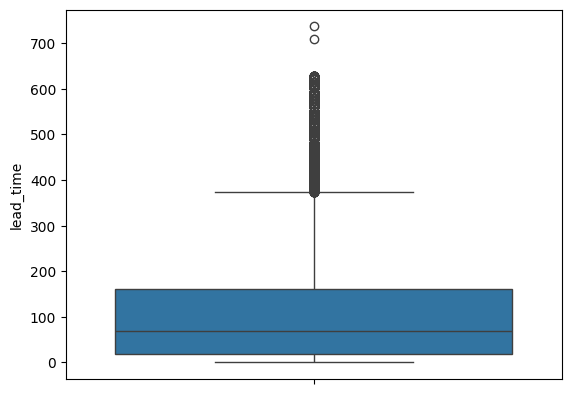

In [19]:
sns.boxplot(data = df["lead_time"])
plt.show()

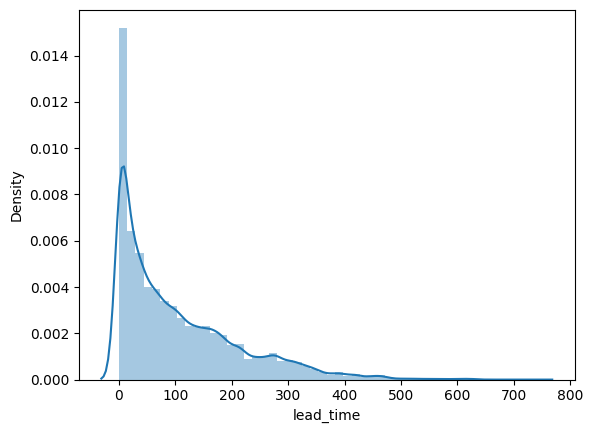

In [23]:
sns.distplot(df['lead_time'])
plt.show()

In [26]:
df.shape

(119390, 33)

In [24]:
q1 = df['lead_time'].quantile(0.25)
q3 = df['lead_time'].quantile(0.75)

iqr = q3 - q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5
print(min_range, max_range)

-195.0 373.0


In [29]:
df = df[df['lead_time']<max_range]

In [30]:
df.shape

(116356, 33)

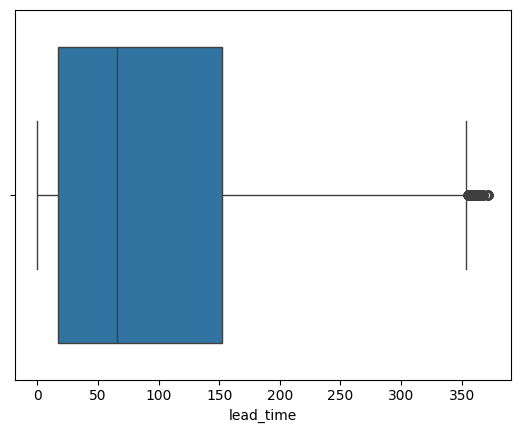

In [32]:
sns.boxplot(x = df['lead_time'], data=df)
plt.show()

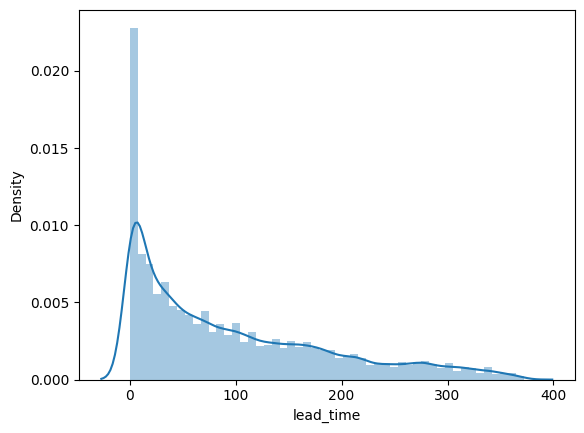

In [33]:
sns.distplot(df['lead_time'])
plt.show()

# Z Score Method

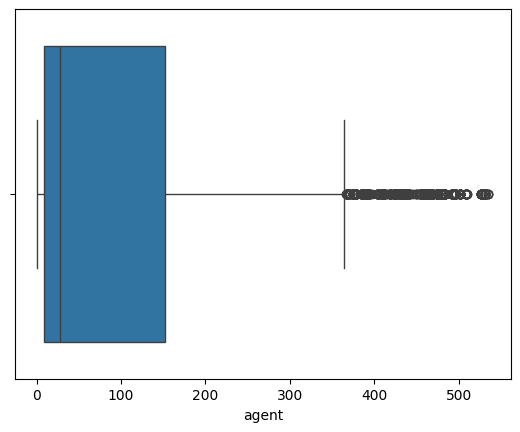

In [34]:
sns.boxplot(data=df, x=df['agent'])
plt.show()

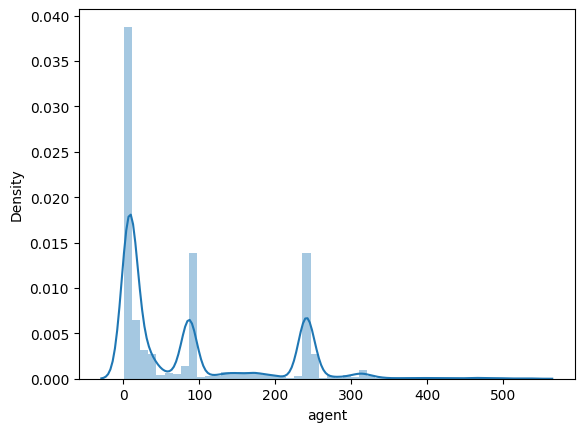

In [35]:
sns.distplot(df['agent'])
plt.show()

In [36]:
z_score = (df['agent']- df['agent'].mean())/ df['agent'].std()
print(z_score)

0        -0.002997
2        -0.002997
3         2.109284
4         1.487186
5         1.487186
            ...   
119385    2.984109
119386   -0.758199
119387   -0.758199
119388    0.019424
119389   -0.758199
Name: agent, Length: 116356, dtype: float64


In [37]:
min_range = df['agent'].mean() - 3*df['agent'].std()
max_range = df['agent'].mean() + 3*df['agent'].std()

print(min_range, max_range)

-221.6313171658853 395.63479864667727


In [38]:
df = df[df['agent']<max_range]

In [40]:
df.shape

(115385, 33)

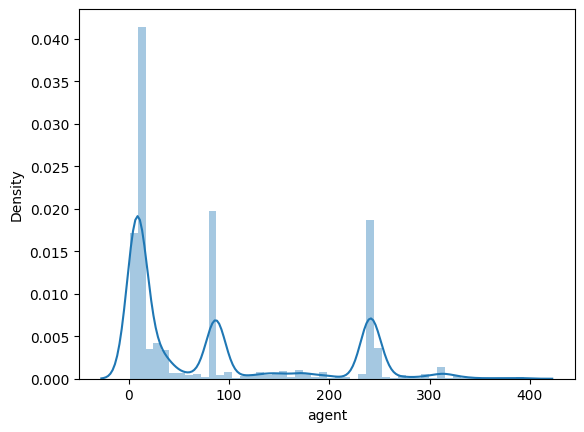

In [41]:
sns.distplot(df['agent'])
plt.show()